# Linearna regresija

**"Linear approach to modelling the relationship between a scalar response and one or more explanatory variables"**

# Pregled
* Nadgledano učenje
* Prosta linearna regresija
* Višestruka linearna regresija: više feature-a
* Polinomijalna regresija: polinom umesto linearne funkcije

# Nadgledano učenje

**Nadgledano učenje** (induktivno učenje, supervised learning) se bavi problemima u mašinskom učenju gde treba otkriti vezu između ulaznih i izlaznih podataka tj. "naučiti" funkciju koja mapira ulaze na izlaze, na osnovu datog skupa parova $(ulaz, izlaz)$. Tu funkciju nazivamo **hipoteza**. 

Dva glavna tipa problema su **regresija** i **klasifikacija**.

[Više o nadgledanom učenju](https://mcerovic.github.io/notes/SupervisedLearning/index.html)




# Linearna regresija

* **Linearna regresija** (Linear Regression) je jedna od najpoznatijih metoda nadgledanog učenja
* Za početak bavićemo se **prostom** linearnom regresijom  (simple LR, univariate LR)
  * Imamo jednu ulaznu promenljivu (**feature**) i jednu izlaznu promenljivu
* **Notacija**:
  * $x$: Ulazni podaci (features), $x^{(i)}$: Ulazni podatak iz i-tog trening primera
  * $y$: Izlazni podaci (labels), $y^{(i)}$: Izlazni podatak iz i-tog trening primera
  * $m$: Veličina trening skupa - broj semplova
* **Hipoteza (model)**: $ h_\theta(x) = \theta_0 + \theta_1 x $
  * Linearna funkcija!
  * "Učimo" parametre $\theta_0$ i $\theta_1$, tj. modifikujemo ih tako da budu "što bolji"
  * Kako znamo kada su "bolji"?
* **Funkcija troška** (kriterijumska funkcija, funkcija koštanja, cost function, loss function)
  * U ovom slučaju za funkciju troška uzimamo **MSE** (srednje kvadratno odstupanje, mean squared error)
  * $J(\theta_0, \theta_1) = \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)} - y^{(i)})^2$ (nekada $\frac{1}{2m}$ zbog lepšeg izvoda)
 * Dakle, menjamo $\theta_0$ i $\theta_1$ tako da **minimizujemo** funkciju troška, kako?
* **Optimizacija: gradijentni spust** (gradient descent): iterativni optimizacioni metod za minimizaciju funkcije
    * Određuje u kom smeru treba da se krećemo da što efikasnije poboljšamo vrednosti parametara, varijante: 
        * **Stochastic**: Računamo funkciju troška za svaki trening primer i ažuriramo parametre jednom po primeru
        * **Batch**: Agregiramo funkciju troška za sve primere u trening skupu i ažuriramo parametre jednom za ceo skup
        * **Minibatch**: Delimo trening skup na manje skupove (*batches*) fiksne veličine, i nad njima agregiramo funkciju troška, jedno ažuriranje parametara po batch-u
* [Više o linearnoj regresiji](https://mcerovic.github.io/notes/LinearRegression/index.html)
* [Više o gradijentnom spustu](https://mcerovic.github.io/notes/GradientDescent/index.html)
* [Više o 3 varijante gradijentnog spusta](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)

# Primer: predviđanje očekivanog životnog veka (OŽV) na osnovu nataliteta

Istraživanje od strane World Bank:  [World Development Indicators](https://datacatalog.worldbank.org/dataset/world-development-indicators).

[Prateća vizualizacija](https://www.google.com/publicdata/explore?ds=d5bncppjof8f9_&ctype=b&strail=false&nselm=s&met_x=sp_dyn_le00_in&scale_x=lin&ind_x=false&met_y=sp_dyn_tfrt_in&scale_y=lin&ind_y=false&met_s=sp_pop_totl&scale_s=lin&ind_s=false&dimp_c=country:region&ifdim=country&iconSize=0.5&uniSize=0.035#!ctype=b&strail=false&bcs=d&nselm=s&met_x=sp_dyn_le00_in&scale_x=lin&ind_x=false&met_y=sp_dyn_tfrt_in&scale_y=lin&ind_y=false&met_s=sp_pop_totl&scale_s=lin&ind_s=false&dimp_c=country:region&ifdim=country&pit=1421395200000&hl=en_US&dl=en_US&ind=false)

Ovo ukazuje na određenu korelaciju (veći natalitet => manji životni vek). Pokušaćemo da kvantifikujemo ovaj odnos tj. da naučimo funkciju $OŽV = f(natalitet)$.


Epoch: 10/100| Avg loss: 375.46
Epoch: 20/100| Avg loss: 112.80
Epoch: 30/100| Avg loss: 50.13
Epoch: 40/100| Avg loss: 35.23
Epoch: 50/100| Avg loss: 31.71
Epoch: 60/100| Avg loss: 30.89
Epoch: 70/100| Avg loss: 30.71
Epoch: 80/100| Avg loss: 30.67
Epoch: 90/100| Avg loss: 30.66
Epoch: 100/100| Avg loss: 30.66
theta_0 = 85.84, theta_1 = -5.51


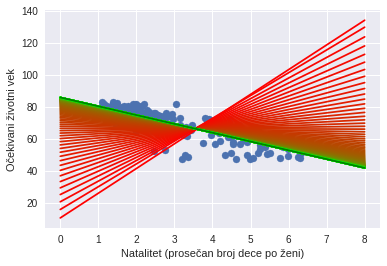

Finalni loss: 30.86428


In [5]:
%matplotlib inline
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

# Korak 1: Učitavanje i obrada podataka.
# Često ćemo koristiti numpy zbog gotovih funkcija za parsiranje.
filename = 'birth_life_2010.tsv'
data = dict()
data['x'], data['y'] = np.loadtxt(filename, delimiter='\t', unpack=True, 
                                  skiprows=1, usecols=(1, 2))
# print(len(data['x']), len(data['y']))

# Nasumično mešanje podataka: uvek dobra ideja da se eliminiše bilo koja 
# pravilnost koja potencijalno postoji u ulaznom fajlu.
nb_samples = len(data['x'])
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

# Normalizacija: ubrzava gradijentni spust i čini sve promenljive ravnopravnim.
# Često dobra ideja, sada ćemo je izostaviti zarad jasnije vizualizacije.
# data['x'] = (data['x'] - np.mean(data['x'])) / np.std(data['x'])
# data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])
plt.scatter(data['x'], data['y'])
plt.xlabel('Natalitet (prosečan broj dece po ženi)')
plt.ylabel('Očekivani životni vek')

# Korak 2: Model - linearna regresija.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
theta_0 = tf.Variable(0.0)
theta_1 = tf.Variable(0.0)
hyp = tf.add(theta_0, tf.multiply(theta_1, X))

# Korak 3: Funkcija troška (MSE) i optimizacija.
# tf.train.Optimizer je porodica klasa koja generiše op-ove koji nemaju povratnu
# vrednost ali pri svakom pokretanju vrše iteraciju algoritma za minimizaciju
# određene promenljive.
loss = tf.reduce_mean(tf.square(hyp - Y))
opt_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# Korak 4: Trening.
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  # Izvršavamo 100 epoha treninga (epoha = prolaz kroz sve podatke).
  nb_epochs = 100
  for epoch in range(nb_epochs):
    
    # Stochastic Gradient Descent (SGD).
    epoch_loss = 0
    for sample in range(nb_samples):
      feed = {X: data['x'][sample], Y: data['y'][sample]}
      _, curr_loss = sess.run([opt_op, loss], feed_dict=feed)
      epoch_loss += curr_loss
    
    # U svakoj desetoj epohi ispisujemo prosečan loss.
    epoch_loss /= nb_samples
    if (epoch + 1) % 10 == 0:
      print('Epoch: {}/{}| Avg loss: {:.2f}'.format(epoch+1, nb_epochs, 
                                              epoch_loss))
    
    # Dodajemo na grafik sve usputne hipoteze da prikažemo napredak.
    theta_0_val, theta_1_val = sess.run([theta_0, theta_1])
    xs = np.linspace(0, 8, 100)
    plt.plot(xs.tolist(), (theta_0_val + theta_1_val * xs).tolist(), 
            color=(1 - epoch / nb_epochs, epoch / nb_epochs, 0))
  
  # Ispisujemo i plotujemo finalnu vrednost parametara.
  theta_0_val, theta_1_val = sess.run([theta_0, theta_1])
  print('theta_0 = {:.2f}, theta_1 = {:.2f}'.format(theta_0_val, theta_1_val))
  xs = np.linspace(0, 8, 100)
  plt.plot(xs.tolist(), (theta_0_val + theta_1_val * xs).tolist(), color='g')
  plt.show()
  
  # Ispisujemo finalni MSE.
  final_loss = sess.run(loss, feed_dict={X: data['x'], Y: data['y']})
  print('Finalni loss: {:.5f}'.format(final_loss))

# Višestruka linearna regresija

* **Višestruka linearna regresija** (Multiple Linear Regression, nekad i Multivariate Linear Regression) je ime za linearnu regresiju gde radimo sa više od jednim ulaznim feature-om
* Kao primer radićemo sa datasetom sa sajta **kaggle** pod imenom [**80 cereals**](https://www.kaggle.com/crawford/80-cereals)
* Dati su razni podaci o 80 tipova cerealija sa kojima možemo raditi svašta... 
    * Recimo da želimo da predvidimo promenljivu **rating** na osnovu promenljivih **fat** i **sugars**


---



* Dodatna notacija: $x_i$ je i-ti feature, dakle $x_i^{(j)}$ je i-ti feature u j-tom trening primeru
* Hipoteza je sada: $ h_\theta(x) = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n $
  * I dalje linearna funkcija samo po više promenlijvih; umesto fitovanja prave fitujemo ravan tj. hiperravan u određenom broju dimenzija
  * "Učimo" parametre $\theta_0, \theta_1, \dots, \theta_n$
  * **Vektorizovana hipoteza**: $h_\theta(X)=X\Theta + bias$, gde je:
    * $X$ matrica $m\times n$ u kojoj je svaki red jedan trening primer,
    * $\Theta$ column-vektor dužine $n$ koji sadrži parametre $\theta_1, \theta_2, \dots, \theta_n$
    * $bias$ oznaka za parametar koji označava slobodan član ($\theta_0$)
* Funkcija troška ostaje ista, kao i metod optimizacije


---

* Poći ćemo od prethodnog koda, i koristićemo vektorizovanu formulaciju tako da kod može da radi sa bilo kojim brojem trening primera
  * Moramo biti veoma pažljivi sa shape-ovima i broadcastingom

## Primer za broadcasting

In [6]:
import tensorflow as tf

# Broadcasting: "magično" vršenje operacija nad tenzorima dimenzija koje se 
# zapravo ne slažu.

# Primer: skalar b se broadcastovao na elemente matrice a (2, 3).
tf.reset_default_graph()
with tf.Session() as sess:
  a = tf.constant([[1, 2, 3], [4, 5, 6]])
  b = tf.constant(10)
  c = tf.add(a, b)
  print('Skalar na matricu:')
  print(sess.run(c))

# Primer: vektor b (3) se broadcastovao na redove matrice a (2, 3).
tf.reset_default_graph()
with tf.Session() as sess:
  a = tf.constant([[1, 2, 3], [4, 5, 6]])
  b = tf.constant([10, 10, 10])
  c = tf.add(a, b)
  print('Skalar na redove matrice:')
  print(sess.run(c))

# Primer: matrica b (2, 1) se broadcastovala na kolone matrice a (2, 3).
tf.reset_default_graph()
with tf.Session() as sess:
  a = tf.constant([[1, 2, 3], [4, 5, 6]])
  b = tf.constant([[10], [10]])
  c = tf.add(a, b)
  print('Skalar na kolone matrice:')
  print(sess.run(c))
  
# Primer: sabiramo vektor a (3) i matricu b (3, 1).
# ???
tf.reset_default_graph()
with tf.Session() as sess:
  a = tf.constant([1, 2, 3])
  b = tf.constant([[10], [10], [10]])
  c = tf.add(a, b)
  print('???:')
  print(sess.run(c))
  
# Postoji još mnogo dodatnih funkcija i pravila, koja često nisu ista kao u 
# numpy. Zbog toga, shape-ovi su veoma čest izvor komplikacija i grešaka. 

# Za sada, definisaćemo varijable/placeholdere/konstante "matematički" (vektor 
# je vektor, matrica je matrica). Za ovo u slučaju placeholdera koristimo 
# atribut shape. Pri računanju, koristićemo tf.reshape gde je potrebno. Jedan
# vektor možemo npr. koristiti i kao vektor i kao 1xN ili Nx1 matricu.

Skalar na matricu:
[[11 12 13]
 [14 15 16]]
Skalar na redove matrice:
[[11 12 13]
 [14 15 16]]
Skalar na kolone matrice:
[[11 12 13]
 [14 15 16]]
???:
[[11 12 13]
 [11 12 13]
 [11 12 13]]


## 80 cereals višestruka linearna regresija

77 77
[[1. 6.]
 [5. 8.]
 [1. 5.]
 [0. 0.]
 [2. 8.]]
[68.402973 33.983679 59.425505 93.704912 34.384843]
Epoch: 5/50| Avg loss: 0.50593
Epoch: 10/50| Avg loss: 0.40466
Epoch: 15/50| Avg loss: 0.38618
Epoch: 20/50| Avg loss: 0.38212
Epoch: 25/50| Avg loss: 0.38104
Epoch: 30/50| Avg loss: 0.38071
Epoch: 35/50| Avg loss: 0.38059
Epoch: 40/50| Avg loss: 0.38054
Epoch: 45/50| Avg loss: 0.38052
Epoch: 50/50| Avg loss: 0.38052
w =  [-0.22043198 -0.69463253] bias =  -0.0058305594
Finalni loss: 0.37825


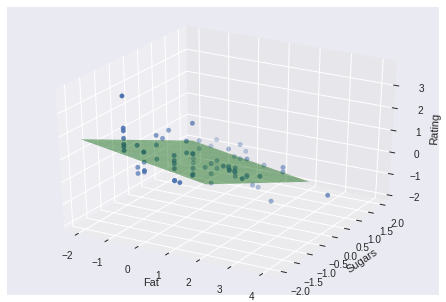

In [7]:
%matplotlib inline
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

tf.reset_default_graph()

# Korak 1: Učitavanje i obrada podataka.
filename = 'cereal.csv'
all_data = np.loadtxt(filename, delimiter=',', skiprows=1, usecols=(5, 9, 15))
data = dict()
data['x'] = all_data[:, :2]
data['y'] = all_data[:, 2]
nb_features = 2

print(len(data['x']), len(data['y']))
print(data['x'][:5])
print(data['y'][:5])

# Nasumično mešanje.
nb_samples = data['x'].shape[0]
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

# Normalizacija (obratiti pažnju na axis=0).
data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)
data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])

# Iscrtavanje.
ax = Axes3D(plt.figure())
ax.scatter(data['x'][:,0], data['x'][:,1], data['y'])
ax.set_xlabel('Fat')
ax.set_ylabel('Sugars')
ax.set_zlabel('Rating')

# Korak 2: Model.
# Primetiti 'None' u atributu shape placeholdera i -1 u 'tf.reshape'.
X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32)
Y = tf.placeholder(shape=(None), dtype=tf.float32)
w = tf.Variable(tf.zeros(nb_features))
bias = tf.Variable(0.0)

w_col = tf.reshape(w, (nb_features, 1))
hyp = tf.add(tf.matmul(X, w_col), bias)

# Korak 3: Funkcija troška i optimizacija.
Y_col = tf.reshape(Y, (-1, 1))
loss = tf.reduce_mean(tf.square(hyp - Y_col))
opt_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# Korak 4: Trening.
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  # Izvršavamo 50 epoha treninga.
  nb_epochs = 50
  for epoch in range(nb_epochs):
    
    # Stochastic Gradient Descent.
    epoch_loss = 0
    for sample in range(nb_samples):
      feed = {X: data['x'][sample].reshape((1, nb_features)), 
              Y: data['y'][sample]}
      _, curr_loss = sess.run([opt_op, loss], feed_dict=feed)
      epoch_loss += curr_loss
    
    # U svakoj petoj epohi ispisujemo prosečan loss.
    epoch_loss /= nb_samples
    if (epoch + 1) % 5 == 0:
      print('Epoch: {}/{}| Avg loss: {:.5f}'.format(epoch+1, nb_epochs, 
                                              epoch_loss))
 
  # Ispisujemo i plotujemo finalnu vrednost parametara.
  w_val = sess.run(w)
  bias_val = sess.run(bias)
  print('w = ', w_val, 'bias = ', bias_val)
  x1s, x2s = np.meshgrid(np.linspace(-2.0, 2.0, 100), 
                         np.linspace(-2.0, 2.0, 100))
  ys = x1s * w_val[0] + x2s * w_val[1] + bias_val
  ax.plot_surface(x1s, x2s, ys, color='g', alpha=0.5)
  
  # Ispisujemo finalni MSE.
  final_loss = sess.run(loss, feed_dict={X: data['x'], Y: data['y']})
  print('Finalni loss: {:.5f}'.format(final_loss))

# Polinomijalna regresija

* **Polinomijalna regresija** (Polynomial Regression) je naziv za regresiju u kojoj umesto linearne funkcije, učimo polinom nekog stepena
* Izraženo preko višestruke linearne regresije: od stepenovanih feature-a pravimo nove feature i zatim radimo istu proceduru kao u višestrukoj regresiji
* Cela postavka dakle ostaje ista kao u višestrukoj linearnoj regresiji, samo je priprema feature-a drukčija
  * U slučaju jednog inicijalnog feature-a $x$ novi feature-i postaju $ x_1 = x^1, x_2 = x^2, x_3 = x^3 \dots $
---
* Primenimo kod za višestruku regresiju na problem predviđanja **rating** pomoću **sugars** koristeći polinomijalnu regresiju i posmatrajmo kako stepen polinoma utiče na kvalitet rešenja
  * Polinomijalna regresija se mogla primeniti i na prvi primer (OŽV) ali su tu podaci po prirodi linearne prirode pa polinomi većeg stepena ne bi doneli značajna poboljšanja

Originalne vrednosti (prve 3):
[-1.56753  1.37636  0.47055]
Feature matrica (prva 3 reda):
[[ -1.56753   2.45713  -3.85162   6.03751  -9.46395  14.83498 -23.2542
   36.45154 -57.1387 ]
 [  1.37636   1.89438   2.60735   3.58866   4.9393    6.79828   9.3569
   12.87849  17.72549]
 [  0.47055   0.22142   0.10419   0.04903   0.02307   0.01086   0.00511
    0.0024    0.00113]]
Epoch: 100/1000| Avg loss: 0.41230
Epoch: 200/1000| Avg loss: 0.39499
Epoch: 300/1000| Avg loss: 0.38310
Epoch: 400/1000| Avg loss: 0.37416
Epoch: 500/1000| Avg loss: 0.36723
Epoch: 600/1000| Avg loss: 0.36172
Epoch: 700/1000| Avg loss: 0.35727
Epoch: 800/1000| Avg loss: 0.35360
Epoch: 900/1000| Avg loss: 0.35053
Epoch: 1000/1000| Avg loss: 0.34793
w =  [-0.95569 -0.75181  0.45752  0.23554 -0.10144  0.22205 -0.12809 -0.06456
  0.04177] bias =  0.084554836


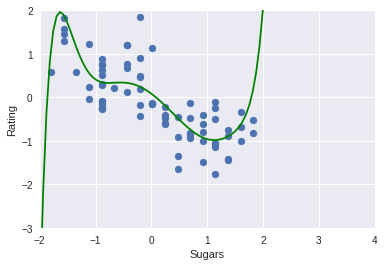

In [13]:
%matplotlib inline
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

# Pomocna funkcija koja od niza trening primera pravi feature matricu (m X n).
def create_feature_matrix(x, nb_features):
  tmp_features = []
  for deg in range(1, nb_features+1):
    tmp_features.append(np.power(x, deg))
  return np.column_stack(tmp_features)

tf.reset_default_graph()

# Izbegavamo scientific notaciju i zaokruzujemo na 5 decimala.
np.set_printoptions(suppress=True, precision=5)  

# Korak 1: Učitavanje i obrada podataka.
filename = 'cereal.csv'
all_data = np.loadtxt(filename, delimiter=',', skiprows=1, usecols=(9, 15))
data = dict()
data['x'] = all_data[:, 0]
data['y'] = all_data[:, 1]

# Nasumično mešanje.
nb_samples = data['x'].shape[0]
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

# Normalizacija (obratiti pažnju na axis=0).
data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)
data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])

# Kreiranje feature matrice.
# Ovom promenljivom kontrolisemo broj feature-a tj. stepen polinoma. Varirati!
# nb_features = 1, avg loss u 1000toj epohi = 0.42
# nb_features = 9, avg loss u 1000toj epohi = 0.33
# Overfitting, regularizacija...
nb_features = 9
print('Originalne vrednosti (prve 3):')
print(data['x'][:3])
print('Feature matrica (prva 3 reda):')
data['x'] = create_feature_matrix(data['x'], nb_features)
print(data['x'][:3, :])

# Iscrtavanje.
plt.scatter(data['x'][:, 0], data['y'])
plt.xlabel('Sugars')
plt.ylabel('Rating')

# Korak 2: Model.
# Primetiti 'None' u atributu shape placeholdera i -1 u 'tf.reshape'.
X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32)
Y = tf.placeholder(shape=(None), dtype=tf.float32)
w = tf.Variable(tf.zeros(nb_features))
bias = tf.Variable(0.0)

w_col = tf.reshape(w, (nb_features, 1))
hyp = tf.add(tf.matmul(X, w_col), bias)

# Korak 3: Funkcija troška i optimizacija.
Y_col = tf.reshape(Y, (-1, 1))
loss = tf.reduce_mean(tf.square(hyp - Y_col))

# Prelazimo na AdamOptimizer jer se prost GradientDescent lose snalazi sa 
# slozenijim funkcijama.
opt_op = tf.train.AdamOptimizer().minimize(loss)

# Korak 4: Trening.
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  # Izvršavamo 100 epoha treninga.
  nb_epochs = 1000
  for epoch in range(nb_epochs):
    
    # Stochastic Gradient Descent.
    epoch_loss = 0
    for sample in range(nb_samples):
      feed = {X: data['x'][sample].reshape((1, nb_features)), 
              Y: data['y'][sample]}
      _, curr_loss = sess.run([opt_op, loss], feed_dict=feed)
      epoch_loss += curr_loss
      if epoch == nb_epochs - 1 and data['x'][sample][0] == 3:
        print(data['x'][sample])
        print(curr_loss)
        
    # U svakoj desetoj epohi ispisujemo prosečan loss.
    epoch_loss /= nb_samples
    if (epoch + 1) % 100 == 0:
      print('Epoch: {}/{}| Avg loss: {:.5f}'.format(epoch+1, nb_epochs, 
                                              epoch_loss))
 
  # Ispisujemo i plotujemo finalnu vrednost parametara.
  w_val = sess.run(w)
  bias_val = sess.run(bias)
  print('w = ', w_val, 'bias = ', bias_val)
  xs = create_feature_matrix(np.linspace(-2, 4, 100), nb_features)
  hyp_val = sess.run(hyp, feed_dict={X: xs})  # Bez Y jer nije potrebno.
  plt.plot(xs[:, 0].tolist(), hyp_val.tolist(), color='g')
  plt.xlim([-2, 4])
  plt.ylim([-3, 2])
  plt.show()